In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [126]:
#import data
df = pd.read_pickle('../data/processed/skills_cluster.pkl')

In [127]:
data = df.copy()

In [128]:
df.head()

,skill,label
0,.Net,423
1,.Net Core,337
2,.Net Development,94
3,.Net Framework,563
4,2D,155


In [129]:
word_embedding = spacy.load("en_core_web_md")

In [44]:
#convert words into vectors
df['skill'] = df['skill'].apply(lambda x:list(word_embedding(x).vector))

In [45]:
df.head()

,skill,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",423
1,"[-0.0092845, -0.0262965, 0.184465, 0.226005, 0...",337
2,"[0.01867, 0.0005098, 0.05625, -0.174205, -0.06...",94
3,"[0.09647, -0.160055, -0.050485, 0.17344, -0.19...",563
4,"[0.54582, 0.99528, 1.0631, -0.2622, 0.27955, 0...",155


In [48]:
#split column into multiple columns
df_skill = pd.DataFrame(df['skill'].to_list(), columns = ['col'+str(i) for i in range(300)])

In [49]:
df_skill['label'] = df['label']

In [50]:
df_skill.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col291,col292,col293,col294,col295,col296,col297,col298,col299,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,423
1,-0.009285,-0.026297,0.184465,0.226005,0.286965,0.089765,-0.128705,0.118690,0.148295,0.6283,...,-0.031903,-0.013978,-0.137255,-0.130880,-0.060150,0.080650,-0.150830,-0.318365,-0.059330,337
2,0.018670,0.000510,0.056250,-0.174205,-0.061360,0.040333,0.246610,0.037849,0.240455,1.3368,...,0.120200,-0.032175,0.217665,-0.014963,0.099185,-0.123890,-0.123575,-0.201010,0.247395,94
3,0.096470,-0.160055,-0.050485,0.173440,-0.191495,-0.060280,0.174380,0.118460,0.134080,0.7060,...,0.079375,-0.097545,0.244705,0.008420,-0.194130,0.190825,-0.146170,-0.072850,0.228755,563
4,0.545820,0.995280,1.063100,-0.262200,0.279550,0.331600,-0.670710,0.246380,0.000949,0.5215,...,-0.172190,-0.383640,-0.084950,-0.476470,-0.190730,0.122760,0.777880,-0.152580,0.322490,155


### Feature Reduction using PCA

In [72]:
pca = PCA(n_components=300)
_=pca.fit_transform(df_skill.drop('label',axis=1))

In [73]:
retention_value = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_retention = np.cumsum(retention_value)

Text(0, 0.5, 'Retention value on scale of 1')

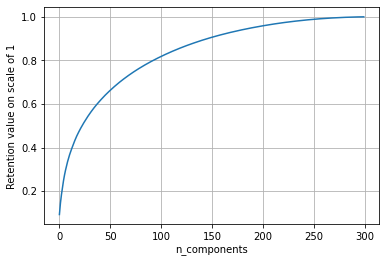

In [74]:
plt.plot(cumulative_retention)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Retention value on scale of 1')

In [76]:
pca = PCA(n_components=250)
X = pca.fit_transform(df_skill.drop('label',axis=1))

In [77]:
y = df_skill['label'].values

In [79]:
clf=RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier()

In [89]:
y_predict = clf.predict(X)

In [104]:
print('Accuracy: ',accuracy_score(y,y_predict))

Accuracy:  0.8212806626314113


### Recommend

In [161]:
val = 'java'
word_vec = word_embedding(val).vector

In [162]:
word_df = pd.DataFrame([list(word_vec)])

In [163]:
data.query('label == {}'.format(clf.predict(pca.transform(word_df))))['skill'].to_list()

['Back-End', 'Hibernate', 'J2Ee', 'Java', 'Spring Boot']